In [1]:
# Hierarchical Clustering

## Sample-to-sample clustering
## Sample-to-gene clustering

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.patches import Patch
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
# Remove warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# Load Raw Read Counts and Differential Expression Results
read_counts_file = "C:/Users/ukwun/Documents/ANALYSIS_NEW/read_counts/combined_reads_soybean_dpi1.csv"
de_results_file = "C:/Users/ukwun/Documents/ANALYSIS_NEW/differential_expression/soybean/1_dpi/sigs_expreesed_genes_soybean_1dpi.csv"

read_counts = pd.read_csv(read_counts_file, index_col=0)
de_results = pd.read_csv(de_results_file, index_col=0)

In [5]:
read_counts.head()

,Alternaria_T1_1,Alternaria_T1_2,Alternaria_T1_3,Alternaria_T1_4,Control_T1_1,Control_T1_2,Control_T1_3,Control_T1_4
Geneid,,,,,,,,
GLYMA_18G079000,37,56,25,22,39,21,19,32
GLYMA_18G080300,987,1030,1134,636,1100,948,1010,1761
GLYMA_18G224800,6,9,4,4,10,0,13,15
GLYMA_18G197600,2829,2841,3018,1997,2832,2493,1769,3121
GLYMA_18G079400,2108,1940,2673,1509,1662,1671,1199,2275


In [6]:
read_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47308 entries, GLYMA_18G079000 to GLYMA_U022500
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Alternaria_T1_1  47308 non-null  int64
 1   Alternaria_T1_2  47308 non-null  int64
 2   Alternaria_T1_3  47308 non-null  int64
 3   Alternaria_T1_4  47308 non-null  int64
 4   Control_T1_1     47308 non-null  int64
 5   Control_T1_2     47308 non-null  int64
 6   Control_T1_3     47308 non-null  int64
 7   Control_T1_4     47308 non-null  int64
dtypes: int64(8)
memory usage: 3.2+ MB


In [7]:
# Smaple-to-sample clustering

In [8]:
# Delete rows if the sum is < 10 across samples
data = read_counts[read_counts.sum(axis = 1) > 10]
data

,Alternaria_T1_1,Alternaria_T1_2,Alternaria_T1_3,Alternaria_T1_4,Control_T1_1,Control_T1_2,Control_T1_3,Control_T1_4
Geneid,,,,,,,,
GLYMA_18G079000,37,56,25,22,39,21,19,32
GLYMA_18G080300,987,1030,1134,636,1100,948,1010,1761
GLYMA_18G224800,6,9,4,4,10,0,13,15
GLYMA_18G197600,2829,2841,3018,1997,2832,2493,1769,3121
GLYMA_18G079400,2108,1940,2673,1509,1662,1671,1199,2275
...,...,...,...,...,...,...,...,...
GLYMA_U009100,136,112,132,119,82,62,55,57
GLYMA_U009000,34,31,111,45,11,19,19,18
GLYMA_U007000,3108,4086,3092,2657,1690,1643,1501,2317


In [9]:
# Normalize Read Counts using CPM and Log2 Transformation
def normalize_counts_cpm(df):
  
    # Compute CPM: (read count / total reads per sample) * 1,000,000
    cpm = df.div(df.sum(axis=0), axis=1) * 1e6
    # Apply log2 transformation (adding 1 to avoid log(0))
    log_cpm = np.log2(cpm + 1)
    return log_cpm

In [10]:
# Apply normalization
normalized_counts = normalize_counts_cpm(data)

In [11]:
# Compute the correlation matrix
correlation_matrix = normalized_counts.corr()

In [12]:
# Define condition labels and their colors
conditions = ['Alternaria'] * 4 + ['Control'] * 4
condition_colors = {'Alternaria': 'lightcoral', 'Control': 'lightblue'}
row_colors = [condition_colors[cond] for cond in conditions]

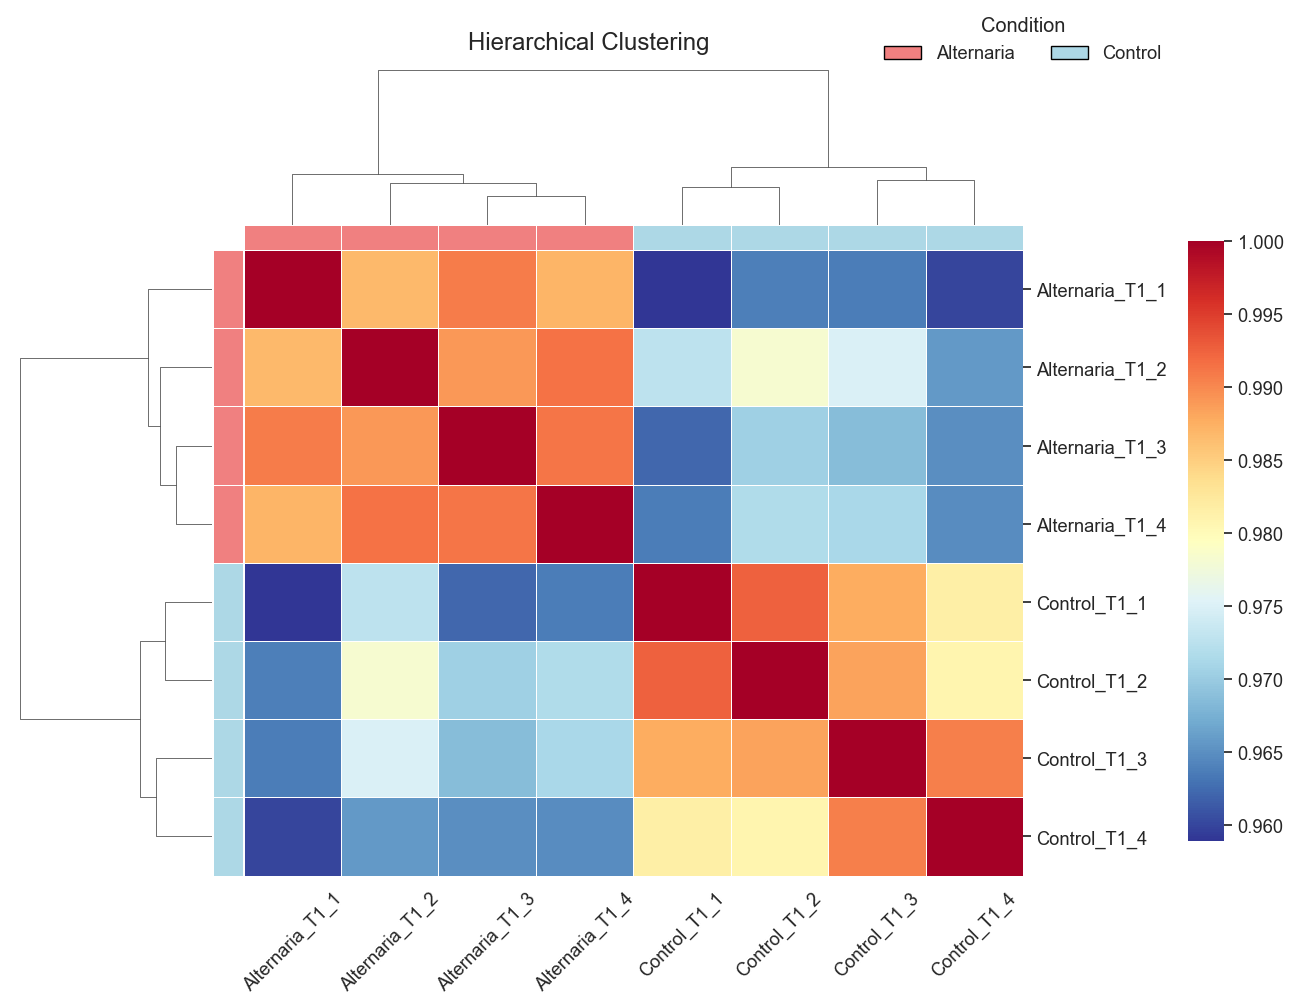

In [13]:
# Generate cluster map
sns.set(font_scale=1.2)  # Adjust font size for readability
g = sns.clustermap(
    correlation_matrix,
    cmap='RdYlBu_r',  # Heatmap color scheme YlOrRd
    linewidths=0.5,
    figsize=(12, 10),  # Adjust figure size
    annot=False,  # Set True for cell annotations
    cbar_kws={"label": ""},  # Adjust color bar label
    row_cluster=True,
    col_cluster=True,
    row_colors=row_colors,  # Add condition-based colors
    col_colors=row_colors,  # Add condition-based colors
    cbar_pos=(1, 0.2, 0.03, 0.6)  # Position color bar at the right
)

# Create a custom legend for conditions
legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=label)
    for label, color in condition_colors.items()
]
g.ax_heatmap.legend(
    handles=legend_elements,
    title="Condition",
    loc="upper center",
    bbox_to_anchor=(1, 1.40), #0.5, 1.15
    ncol=2,  # Display legend in a single row
    frameon=False
)

# label rotation
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)  # Keep y-axis labels horizontal
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)  # Rotate x-axis labels

g.fig.suptitle("Hierarchical Clustering", y=1.01)
g.savefig('sample_to_sample_HC_soybean_1dpi.png', dpi=600, bbox_inches="tight")
plt.show()

In [14]:
# Gene-to-sample clustering

In [15]:
de_results.head(3)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
GLYMA_18G022100,168.033907,2.124419,0.248605,8.545351,1.281463e-17,1.046149e-15
GLYMA_18G238100,11.222484,5.343060,1.316035,4.059968,4.907952e-05,3.626207e-04
GLYMA_18G283500,11.560111,3.078785,1.010345,3.047259,2.309383e-03,9.682472e-03


In [16]:
# Identify Top 10 Significant Genes
# Sort by adjusted p-value
top_genes = de_results.sort_values(by="padj").head(10).index.tolist()

In [17]:
top_genes

['GLYMA_15G077700',
 'GLYMA_05G190100',
 'GLYMA_03G068100',
 'GLYMA_07G200200',
 'GLYMA_01G217400',
 'GLYMA_10G251500',
 'GLYMA_09G131500',
 'GLYMA_03G025600',
 'GLYMA_20G007000',
 'GLYMA_13G176300']

In [18]:
# Extract Data for Heatmap
# Subset normalized counts for the top 10 significant genes

df_subset = normalized_counts.loc[top_genes]

In [19]:
df_subset.head()

,Alternaria_T1_1,Alternaria_T1_2,Alternaria_T1_3,Alternaria_T1_4,Control_T1_1,Control_T1_2,Control_T1_3,Control_T1_4
Geneid,,,,,,,,
GLYMA_15G077700,0.601637,0.692664,0.872886,0.797170,3.496683,3.280431,3.011437,3.493412
GLYMA_05G190100,2.805155,2.481857,3.034252,2.902127,4.964843,5.445419,5.134504,5.320064
GLYMA_03G068100,4.437735,4.997394,4.867373,5.037540,7.721259,7.546805,7.835279,8.154367
GLYMA_07G200200,3.068054,2.834709,3.095061,3.001451,6.214046,5.615549,5.746304,6.545340
GLYMA_01G217400,4.407275,4.619162,4.193302,4.407692,6.560316,6.578963,6.654833,6.618989


In [20]:
# Top 10 significantly expressed genes

linkage_rows = linkage(df_subset, method='average', metric='euclidean')  # Cluster rows
linkage_cols = linkage(df_subset.T, method='average', metric='euclidean')  # Cluster columns

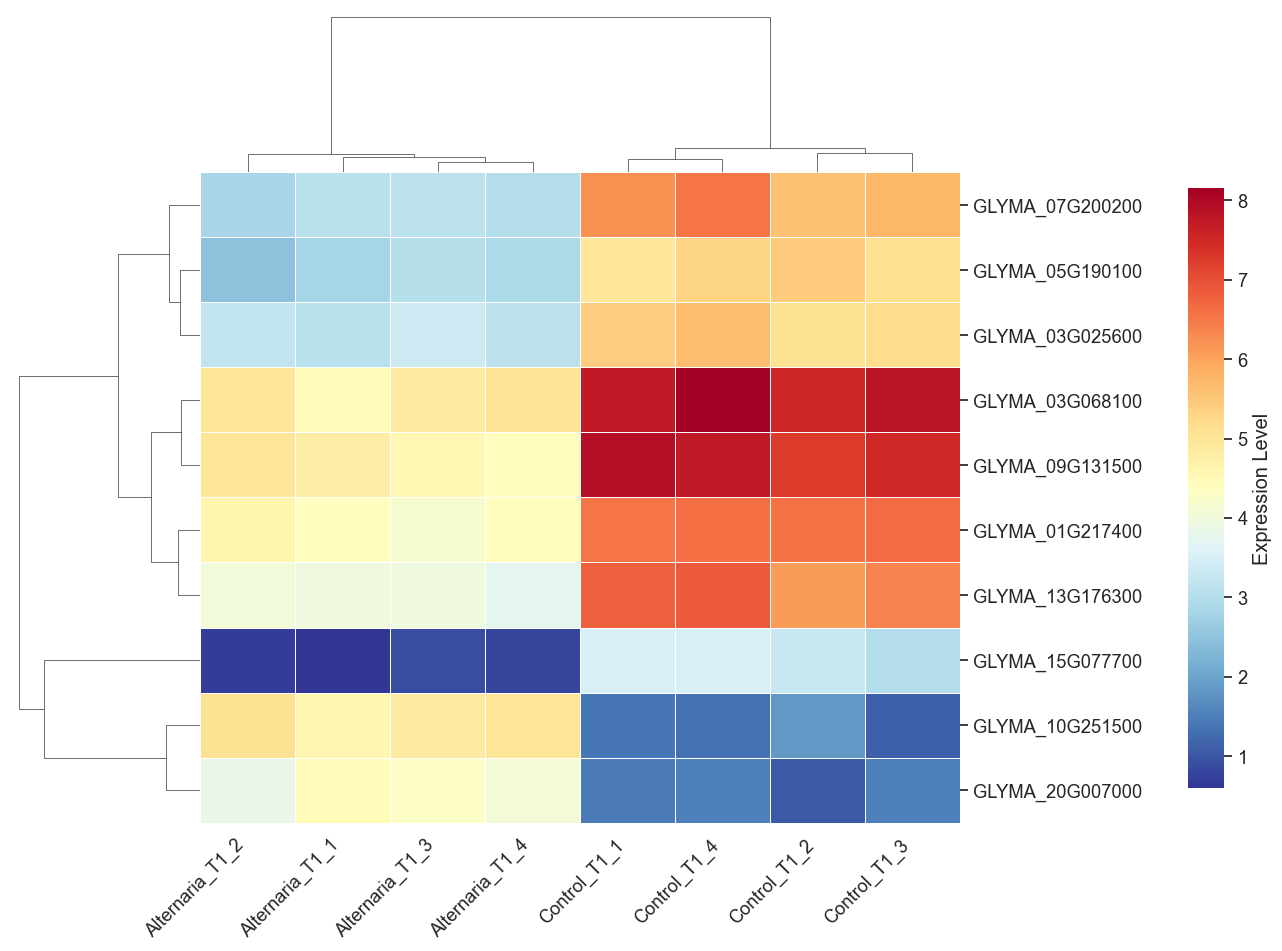

In [21]:
# Set seaborn font scale for readability
sns.set(font_scale=1.2)

# Generate cluster map with adjusted color bar height
g = sns.clustermap(
    df_subset,
    row_linkage=linkage_rows,
    col_linkage=linkage_cols,
    cmap="RdYlBu_r",  
    linewidths=0.5,
    figsize=(12, 10),
    cbar_kws={"label": "Expression Level"},
    cbar_pos=(1, 0.2, 0.03, 0.6)  # Adjusted to match heatmap height
)

# Customize heatmap labels
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotate x-axis labels
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)  # Keep y-axis labels horizontal

# Remove y-axis label name
g.ax_heatmap.set_ylabel("")

# Save figure with high resolution
plt.savefig("Gene_to_sample_HC_soybean_1dpi.png", dpi=600, bbox_inches="tight")

plt.show()

In [23]:
read_counts.head()

,Alternaria_T1_1,Alternaria_T1_2,Alternaria_T1_3,Alternaria_T1_4,Control_T1_1,Control_T1_2,Control_T1_3,Control_T1_4
Geneid,,,,,,,,
GLYMA_18G079000,37,56,25,22,39,21,19,32
GLYMA_18G080300,987,1030,1134,636,1100,948,1010,1761
GLYMA_18G224800,6,9,4,4,10,0,13,15
GLYMA_18G197600,2829,2841,3018,1997,2832,2493,1769,3121
GLYMA_18G079400,2108,1940,2673,1509,1662,1671,1199,2275


In [24]:
top_genes

['GLYMA_15G077700',
 'GLYMA_05G190100',
 'GLYMA_03G068100',
 'GLYMA_07G200200',
 'GLYMA_01G217400',
 'GLYMA_10G251500',
 'GLYMA_09G131500',
 'GLYMA_03G025600',
 'GLYMA_20G007000',
 'GLYMA_13G176300']

In [26]:
print(read_counts.loc["GLYMA_05G190100"])  # Replace with an actual gene ID

Alternaria_T1_1     463
Alternaria_T1_2     320
Alternaria_T1_3     571
Alternaria_T1_4     316
Control_T1_1       2004
Control_T1_2       2662
Control_T1_3       1604
Control_T1_4       2930
Name: GLYMA_05G190100, dtype: int64


In [29]:
# Identify Top 10 Significant Genes
# Sort by adjusted p-value
top_genes_log = de_results.sort_values(by="log2FoldChange").head(10)

In [30]:
top_genes_log

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
GLYMA_09G240400,25.070331,-8.213009,1.711317,-4.799234,1.592739e-06,1.793348e-05
GLYMA_16G193000,6.484695,-6.272492,1.895073,-3.309896,9.333074e-04,4.521783e-03
GLYMA_12G235800,12.561928,-5.808623,1.243830,-4.669948,3.012765e-06,3.143391e-05
GLYMA_16G186900,11.973712,-5.705201,1.233904,-4.623698,3.769586e-06,3.845761e-05
GLYMA_12G228500,8.490900,-5.243273,1.370867,-3.824787,1.308850e-04,8.457971e-04
GLYMA_01G219900,7.498750,-5.036082,1.346992,-3.738760,1.849301e-04,1.136827e-03
GLYMA_02G286500,23.924752,-4.970259,0.798264,-6.226336,4.774696e-10,1.141020e-08
GLYMA_06G318200,46.572278,-4.906484,0.746858,-6.569500,5.048440e-11,1.442200e-09
GLYMA_07G098000,6.516313,-4.762742,1.245059,-3.825314,1.306057e-04,8.443878e-04


In [31]:
print(read_counts.loc["GLYMA_09G240400"])

Alternaria_T1_1     0
Alternaria_T1_2     0
Alternaria_T1_3     0
Alternaria_T1_4     0
Control_T1_1       44
Control_T1_2       39
Control_T1_3       46
Control_T1_4       55
Name: GLYMA_09G240400, dtype: int64
